In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 micro

In [5]:
modulation = 93 #Hz
loop_number = 750    
res = 1/3000240000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [6]:
sam

21552

In [7]:
sr

3006504000

In [8]:
interval = segment_length*1e6 #micro
interval

7.168458781362007

In [3]:
150/1000

0.15

# AWG and Pulse files setup

In [9]:
AWG_Settings_1micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':sr,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\pos\1micro'
}

In [10]:
M8190A = VisaR(AWG_Settings_1micro,60000)

In [11]:
M8190A.write('FREQ:RAST {fr}'.format(fr =sr))

21

In [ ]:
Initialization(M8190A,AWG_Settings_1micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [12]:
Pump_1micro = {
    'Name':'Pump_1micro',
    'Amplitude':2*60,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [13]:
ProbeA_1micro = {
    'Name':'ProbeA_1micro',
    'Amplitude':2*30,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [14]:
ProbeB_1micro= {
    'Name':'ProbeB_1micro',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [15]:
PulseScheme_A_1micro =  {
    'Name' : 'PulseScheme_A_1micro',
    'Pulse Scheme': [Pump_1micro,ProbeA_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\1micro'
}

In [16]:
PulseScheme_B_1micro =  {
    'Name' : 'PulseScheme_B_1micro',
    'Pulse Scheme': [Pump_1micro,ProbeB_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\1micro'
}

In [ ]:
93

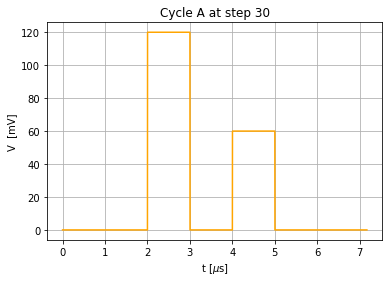

In [17]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro 90Hz.jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path']),bbox_inches='tight')

In [18]:
sweeping_run_a_1micro = Sweeping_Single_List_File_teil(PulseScheme_A_1micro,30,interval,sam,0,30,AWG_Settings_1micro,'A')[0]

In [19]:
sweeping_run_b_1micro = Sweeping_Single_List_File_teil(PulseScheme_B_1micro,30,interval,sam,0,30,AWG_Settings_1micro,'B')[0]

In [20]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_1micro_.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1micro, k)


with open(r"{dict}\cycleB_31steps_90Hz_1micro_.p".format(dict = PulseScheme_B_1micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1micro, h)

In [20]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_90Hz_1micro_.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as j:
    sweeping_run_a_1micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_90Hz_1micro_.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as f:
    sweeping_run_b_1micro= pickle.load(f)

In [21]:
sweeping_run_a_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\1micro\\SegmentA_21552_30.csv'

In [22]:
sweeping_run_b_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\1micro\\SegmentB_21552_30.csv'

In [ ]:
loop_1micro

750

In [ ]:
Sequence_File(M8190A,sweeping_runa_1micro['Pulse File Location, at step 30'],sweeping_runb_1micro['Pulse File Location, at step 30'],50)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

# Loading

In [21]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [22]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '50 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [23]:
loop_number

750

In [24]:
playingtime = 7

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1micro,sweeping_run_b_1micro,PulseScheme_A_1micro['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1,0,21551" and the advancement method is COND
Average Value for measurement at step 0 is 1.5039919643581476 V
Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1,0,21551" and the advancement method is COND
Average Value for measurement at step 1 is 1.5079311984270083 V
Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1,0,21551" and the advancement method is COND
Average Value for measurement at step 2 is 1.5141649481011599 V
Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1,0,21551" and the advancement method is COND
Average Value for measurement at step 3 is 1.5072442381970244 V
Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1,0,21551" and the advancement method is COND
Average Value for measurement at step 4 is 1.487311210285768 V
Sequence loaded with the following segment data "1,750,0,1,0,21551,2,750,0,1

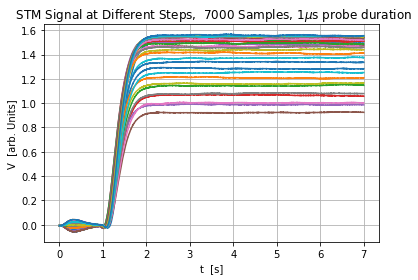

In [25]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [arb. Units]')
ax.set_xlabel('t  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 1$\mu$s probe duration'.format(b = len(data[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\ Sigma STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 micro,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [26]:
time_delay = np.linspace(-2,2,31)

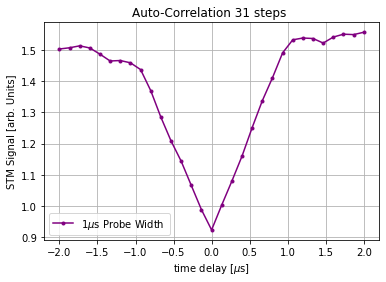

In [27]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.-',label=r'1$\mu$s Probe Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. Units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Sigma Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [28]:
normalized_data = AutoCorrelation_Normalized(averaged_data,time_delay,8,8)
np.savetxt(r'{loc}\normalized Autocorrelation.csv'.format(loc = PulseScheme_A_1micro['Measurement file Path']),normalized_data[0],delimiter=',')
normalized_data

(array([0.98650413, 0.98533458, 0.98267975, 0.98860004, 1.00327636,
        1.01969071, 1.02010606, 1.02668416, 1.04369979, 1.09675796,
        1.17128132, 1.24689669, 1.31994081, 1.41875079, 1.53270432,
        1.64309139, 1.51391462, 1.40794959, 1.3122754 , 1.21786984,
        1.14079227, 1.08271268, 1.02598424, 0.99932681, 0.99697592,
        0.99935618, 1.01035615, 0.99908903, 0.99452688, 0.99673919,
        0.99326347]),
 1.5155313916052726,
 0.015918552345151143)

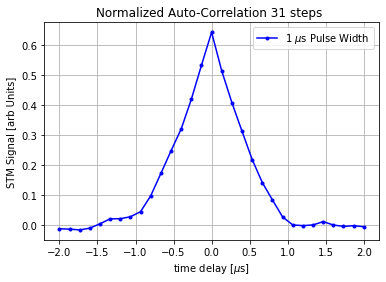

In [30]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_data[0]-1,'.-',label=r'1 $\mu$s Pulse Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation  Sigma STM function 31 steps 1u 93Hz length tc = {a}, sens {b}, {c}s DAQ.jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

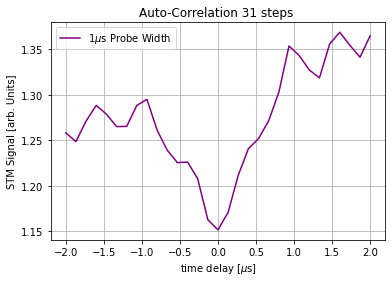

In [31]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1$\mu$s Probe Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. Units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Sigma Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ line .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
drift 100 to 118